In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn. neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### **K-MEANS**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/IAAE/customer_data_large.csv')

In [ ]:
df

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
0,3,0,58,635,88,88,88,8,4,7,65,10,1,718
1,3,1,38,11,1,1,6,1,2,5,63,8,0,8
2,3,0,26,426,49,21,42,8,10,4,57,9,0,238
3,3,1,26,11,4,3,5,7,4,6,38,8,0,30
4,5,1,94,173,43,27,15,5,6,5,41,8,0,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,3,0,46,709,43,118,247,9,4,5,55,9,0,224
2226,5,2,56,406,0,0,8,8,5,7,71,8,1,30
2227,3,0,91,908,48,12,24,2,13,11,41,8,1,249
2228,4,0,8,428,30,30,61,6,10,3,66,8,0,294


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Education           2230 non-null   int64
 1   Kidhome             2230 non-null   int64
 2   Recency             2230 non-null   int64
 3   MntWines            2230 non-null   int64
 4   MntFruits           2230 non-null   int64
 5   MntSweetProducts    2230 non-null   int64
 6   MntGoldProds        2230 non-null   int64
 7   NumWebPurchases     2230 non-null   int64
 8   NumStorePurchases   2230 non-null   int64
 9   NumWebVisitsMonth   2230 non-null   int64
 10  Age                 2230 non-null   int64
 11  Years_customer      2230 non-null   int64
 12  Num_AcceptedCmp     2230 non-null   int64
 13  MntFishMeatProdcts  2230 non-null   int64
dtypes: int64(14)
memory usage: 244.0 KB


Escalar:

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
df_array = scaler.transform(df)
df_sc = pd.DataFrame(df_array,columns=df.columns,index=df.index)

**k-means with fixed k:** 

Inicializamos el algoritmo con k=4

In [ ]:
km_model = KMeans(n_clusters=4,random_state=3)
km_model.fit(df_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=3)

Cluster centroids:

In [ ]:
centers = pd.DataFrame(km_model.cluster_centers_,columns=df_sc.columns)

In [ ]:
centers

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
0,0.627890,0.385838,0.496614,0.040944,0.025155,0.019759,0.034474,0.098085,0.268786,0.368208,0.435470,1.554312e-15,0.032948,0.022452
1,0.646991,0.011574,0.491879,0.314226,0.226852,0.177463,0.187572,0.184365,0.634497,0.232870,0.585746,3.425926e-01,0.088580,0.196309
2,0.655612,0.043367,0.531205,0.492420,0.281817,0.215236,0.199057,0.214365,0.663854,0.391327,0.463404,8.163265e-01,0.241327,0.258655
3,0.565462,0.399882,0.484262,0.051412,0.033408,0.028080,0.069454,0.118928,0.272330,0.427370,0.354653,6.421801e-01,0.041943,0.031497


In [ ]:
centers.std().sort_values()

Recency               0.020776
Education             0.040701
NumWebPurchases       0.054536
MntGoldProds          0.082981
NumWebVisitsMonth     0.084945
Age                   0.095783
Num_AcceptedCmp       0.096548
MntSweetProducts      0.100797
MntFishMeatProdcts    0.118586
MntFruits             0.131901
Kidhome               0.211434
MntWines              0.218696
NumStorePurchases     0.218928
Years_customer        0.358313
dtype: float64

Partiendo de la distancia de cada variable con respecto a la medida de tendencia central, vemos como las variables Kidhome, MntWines, NumStorePurchases y Years_customer, son las que definen la separación entre los clusters pues son las más alejadas de la medida de tendencia central y por ende son las caracteristicas en las que más se diferencian los individuos entre los **4 clusters.** 

Compute the inverse of an scaling:

In [ ]:
centers_unscaled = pd.DataFrame(scaler.inverse_transform(centers),index=centers.index,columns=centers.columns)
centers_unscaled

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
0,3.511561,0.771676,49.164740,61.130058,5.005780,5.196532,12.479769,3.138728,3.494220,7.364162,49.950867,8.000000,0.164740,39.751445
1,3.587963,0.023148,48.695988,469.138889,45.143519,46.672840,67.901235,5.899691,8.248457,4.657407,58.216049,8.685185,0.442901,339.828704
2,3.622449,0.086735,52.589286,735.183673,56.081633,56.607143,72.058673,6.859694,8.630102,7.826531,51.487245,9.632653,1.206633,447.438776
3,3.261848,0.799763,47.941943,76.758294,6.648104,7.385071,25.142180,3.805687,3.540284,8.547393,45.505924,9.284360,0.209716,55.363744


Cluster labels:

In [ ]:
df_cluster = df_sc.copy()
df_cluster['cluster'] = km_model.labels_

In [ ]:
df_cluster

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts,cluster
0,0.50,0.0,0.585859,0.425318,0.442211,0.334601,0.243094,0.25000,0.307692,0.35,0.709091,1.0,0.2,0.415411,2
1,0.50,0.5,0.383838,0.007368,0.005025,0.003802,0.016575,0.03125,0.153846,0.25,0.672727,0.0,0.0,0.004056,0
2,0.50,0.0,0.262626,0.285332,0.246231,0.079848,0.116022,0.25000,0.769231,0.20,0.563636,0.5,0.0,0.137312,1
3,0.50,0.5,0.262626,0.007368,0.020101,0.011407,0.013812,0.21875,0.307692,0.30,0.218182,0.0,0.0,0.016802,0
4,1.00,0.5,0.949495,0.115874,0.216080,0.102662,0.041436,0.15625,0.461538,0.25,0.272727,0.0,0.0,0.094438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,0.50,0.0,0.464646,0.474883,0.216080,0.448669,0.682320,0.28125,0.307692,0.25,0.527273,0.5,0.0,0.129200,1
2226,1.00,1.0,0.565657,0.271936,0.000000,0.000000,0.022099,0.25000,0.384615,0.35,0.818182,0.0,0.2,0.016802,0
2227,0.50,0.0,0.919192,0.608171,0.241206,0.045627,0.066298,0.06250,1.000000,0.55,0.272727,0.0,0.2,0.143685,1
2228,0.75,0.0,0.080808,0.286671,0.150754,0.114068,0.168508,0.18750,0.769231,0.15,0.727273,0.0,0.0,0.169757,1


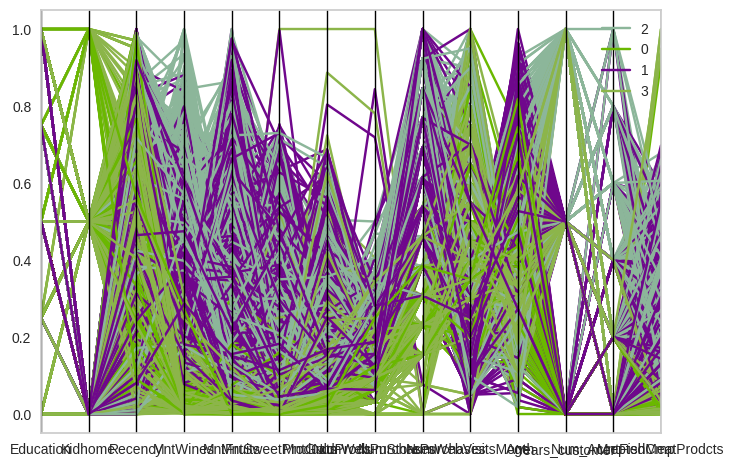

In [ ]:

fig,axes = plt.subplots()
parallel_coordinates(df_cluster,'cluster',ax=axes)
fig.savefig('parallel.png')

In [ ]:
df_cluster0 = df_cluster[df_cluster["cluster"]==0]

In [ ]:
df_cluster0.std().sort_values()

Years_customer        0.000000
cluster               0.000000
MntSweetProducts      0.037499
MntGoldProds          0.042669
MntFruits             0.052537
MntFishMeatProdcts    0.058322
MntWines              0.064446
NumWebPurchases       0.070449
Num_AcceptedCmp       0.089837
NumStorePurchases     0.120918
Age                   0.164277
NumWebVisitsMonth     0.188897
Education             0.263908
Kidhome               0.265071
Recency               0.295893
dtype: float64

**Cluster 0**

Partiendo de la tabla previamente expuesta, vemos como para el cluster 0 las caracteristicas que comparten mayormente los individuos que hacen parte de este son: 



*   Years_customer:        0.000000
*   MntSweetProducts:      0.037499
*   MntGoldProds:          0.042669
*   MntGoldProds:          0.042669
*   MntFruits:             0.052537
*   MntFishMeatProdcts:    0.058322
*   MntWines:              0.064446
*   NumWebPurchases:       0.070449
*   Num_AcceptedCmp:       0.089837

Dado que estas caracteristicas son las más cercanas a la medida de tendencia central del cluster 0, estas son las caracteristicas que estan agrupando y definen al cluster.

In [ ]:
df_cluster1 = df_cluster[df_cluster["cluster"]==1]
df_cluster1.std().sort_values()

cluster               0.000000
Kidhome               0.075245
NumWebPurchases       0.084427
MntFishMeatProdcts    0.142293
MntGoldProds          0.162003
NumWebVisitsMonth     0.162714
Num_AcceptedCmp       0.167514
MntWines              0.169740
MntSweetProducts      0.182999
Age                   0.201650
NumStorePurchases     0.211626
MntFruits             0.228693
Education             0.232374
Years_customer        0.232400
Recency               0.293895
dtype: float64

**Cluster 1**

Partiendo de la tabla previamente expuesta, vemos como para el cluster 1 las caracteristicas que comparten mayormente los individuos que hacen parte de este son: 



*   Kidhome               0.075245
*   NumWebPurchases       0.084427

Dado que estas caracteristicas son las más cercanas a la medida de tendencia central del cluster 1, estas son las caracteristicas que estan agrupando al cluster.

In [ ]:
df_cluster2 = df_cluster[df_cluster["cluster"]==2]
df_cluster2.std().sort_values()

cluster               0.000000
NumWebPurchases       0.091297
Kidhome               0.140903
MntGoldProds          0.157860
MntFishMeatProdcts    0.166929
MntSweetProducts      0.193151
NumStorePurchases     0.207873
Age                   0.213584
MntWines              0.224644
NumWebVisitsMonth     0.236884
Education             0.246498
Years_customer        0.249170
MntFruits             0.252356
Num_AcceptedCmp       0.273700
Recency               0.295920
dtype: float64

**Cluster 2**

Partiendo de la tabla previamente expuesta, vemos como para el cluster 2 la caracteristica que comparten mayormente los individuos que hacen parte de este son: 

*   NumWebPurchases       0.091297

Dado que esta caracteristica es la más cercana a la medida de tendencia central del cluster 2, esta es la caracteristica que esta agrupando al cluster.

In [ ]:
df_cluster3 = df_cluster[df_cluster["cluster"]==3]
df_cluster3.std().sort_values()

cluster               0.000000
MntFruits             0.052653
MntSweetProducts      0.056121
MntWines              0.072097
MntFishMeatProdcts    0.072804
NumWebPurchases       0.089561
Num_AcceptedCmp       0.099317
MntGoldProds          0.099605
NumStorePurchases     0.113448
Age                   0.128892
NumWebVisitsMonth     0.176387
Years_customer        0.225688
Kidhome               0.240576
Education             0.253260
Recency               0.287626
dtype: float64

**Cluster 3**

Partiendo de la tabla previamente expuesta, vemos como para el cluster 3 las caracteristicas que comparten mayormente los individuos que hacen parte de este son: 



*   MntFruits:             0.052653
*   MntSweetProducts:      0.056121
*   MntWines:              0.072097
*   MntFishMeatProdcts:    0.072804
*   NumWebPurchases:       0.089561
*   Num_AcceptedCmp:       0.099317
*   MntGoldProds:          0.099605

Dado que estas caracteristicas son las más cercanas a la medida de tendencia central del cluster 3, estas son las caracteristicas que estan agrupando al cluster.

Number of examples in de cluster

In [ ]:
df_cluster['cluster'].value_counts()

3    844
1    648
2    392
0    346
Name: cluster, dtype: int64

**Best number of clusters (Elbow Method):**

In [ ]:
sse = []
for i in range(2, 11): 
       km = KMeans(n_clusters=i,random_state=0) 
       km.fit(df_sc) 
       sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

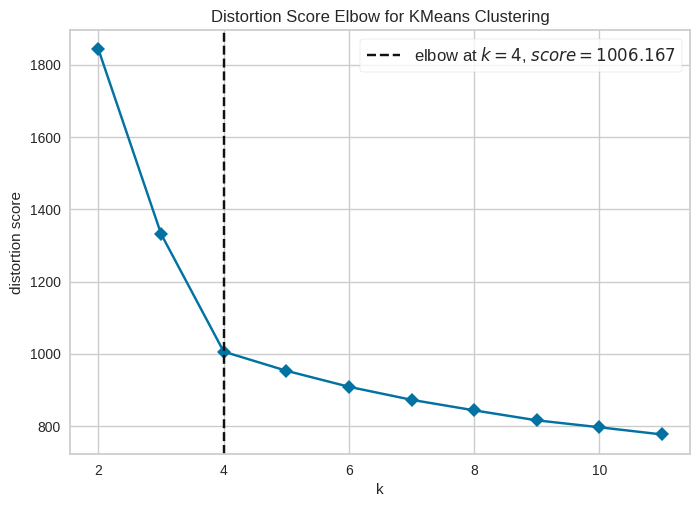

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(km, k=(2,12),timings=False)
visualizer.fit(df_cluster)
visualizer.show()


**Best number of clusters (calinski_harabasz):**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

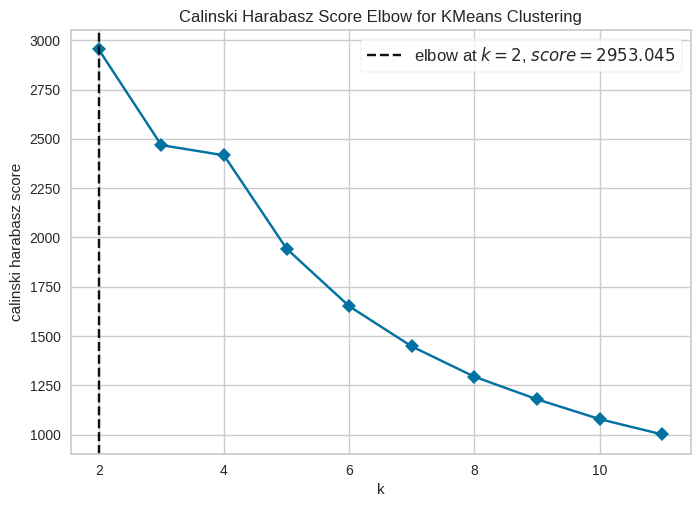

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
visualizer = KElbowVisualizer(
    km, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(df_cluster) 
visualizer.show()  

**Best number of clusters (silhouette):**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

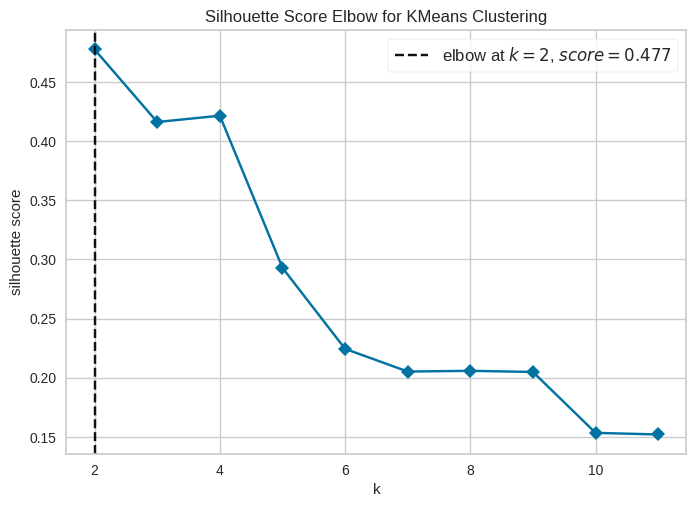

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(
    km, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(df_cluster) 
visualizer.show() 

 **K=2**

In [ ]:
km_model2 = KMeans(n_clusters=2,random_state=3)
km_model2.fit(df_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=3)

In [ ]:
centers2 = pd.DataFrame(km_model2.cluster_centers_,columns=df_sc.columns)

In [ ]:
centers2

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
0,0.645874,0.024272,0.505001,0.384629,0.249724,0.193868,0.195513,0.197512,0.648320,0.294272,0.538729,0.529126,0.147379,0.221906
1,0.587917,0.392083,0.489470,0.048365,0.030963,0.025184,0.057288,0.111979,0.272051,0.407750,0.380273,0.449167,0.039167,0.028658


In [ ]:
centers2.std().sort_values()

Recency               0.010983
Education             0.040982
Years_customer        0.056540
NumWebPurchases       0.060481
Num_AcceptedCmp       0.076517
NumWebVisitsMonth     0.080241
MntGoldProds          0.097740
Age                   0.112046
MntSweetProducts      0.119278
MntFishMeatProdcts    0.136647
MntFruits             0.154688
MntWines              0.237774
Kidhome               0.260082
NumStorePurchases     0.266062
dtype: float64

Partiendo de la distancia de cada variable con respecto a la medida de tendencia central, vemos como las variables MntWines, Kidhome y NumStorePurchases, son las que definen la separación entre los clusters pues son las más alejadas de la medida de tendencia central y por ende son las caracteristicas en las que más se diferencian los individuos entre los **2 clusters**.

In [ ]:
df_cluster2 = df_sc.copy()
df_cluster2['cluster'] = km_model2.labels_

In [ ]:
df_cluster2

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts,cluster
0,0.50,0.0,0.585859,0.425318,0.442211,0.334601,0.243094,0.25000,0.307692,0.35,0.709091,1.0,0.2,0.415411,0
1,0.50,0.5,0.383838,0.007368,0.005025,0.003802,0.016575,0.03125,0.153846,0.25,0.672727,0.0,0.0,0.004056,1
2,0.50,0.0,0.262626,0.285332,0.246231,0.079848,0.116022,0.25000,0.769231,0.20,0.563636,0.5,0.0,0.137312,0
3,0.50,0.5,0.262626,0.007368,0.020101,0.011407,0.013812,0.21875,0.307692,0.30,0.218182,0.0,0.0,0.016802,1
4,1.00,0.5,0.949495,0.115874,0.216080,0.102662,0.041436,0.15625,0.461538,0.25,0.272727,0.0,0.0,0.094438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,0.50,0.0,0.464646,0.474883,0.216080,0.448669,0.682320,0.28125,0.307692,0.25,0.527273,0.5,0.0,0.129200,0
2226,1.00,1.0,0.565657,0.271936,0.000000,0.000000,0.022099,0.25000,0.384615,0.35,0.818182,0.0,0.2,0.016802,1
2227,0.50,0.0,0.919192,0.608171,0.241206,0.045627,0.066298,0.06250,1.000000,0.55,0.272727,0.0,0.2,0.143685,0
2228,0.75,0.0,0.080808,0.286671,0.150754,0.114068,0.168508,0.18750,0.769231,0.15,0.727273,0.0,0.0,0.169757,0


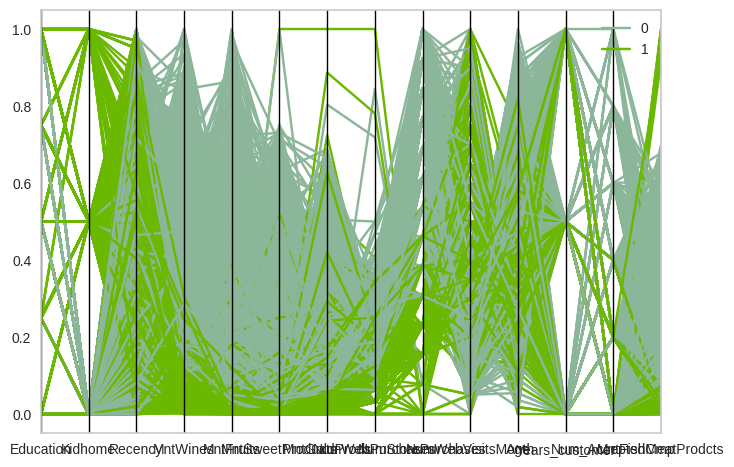

In [ ]:
fig,axes = plt.subplots()
parallel_coordinates(df_cluster2,'cluster',ax=axes)
fig.savefig('parallel.png')

In [ ]:
df2_cluster0 = df_cluster2[df_cluster2["cluster"]==0]

In [ ]:
df2_cluster0.std().sort_values()

cluster               0.000000
NumWebPurchases       0.087765
Kidhome               0.107508
MntFishMeatProdcts    0.154317
MntGoldProds          0.161551
MntSweetProducts      0.187483
NumWebVisitsMonth     0.208554
MntWines              0.209370
NumStorePurchases     0.209934
Age                   0.214746
Num_AcceptedCmp       0.226839
MntFruits             0.239412
Education             0.239492
Recency               0.295049
Years_customer        0.338099
dtype: float64

**Cluster 0**

Partiendo de la tabla previamente expuesta, vemos como para el cluster 0 las caracteristicas que comparten mayormente los individuos que hacen parte de este son:

*   NumWebPurchases       0.087765

Dado que estas caracteristicas son las más cercanas a la medida de tendencia central del cluster 0, estas son las caracteristicas que estan agrupando y definen al cluster.

In [ ]:
df2_cluster1 = df_cluster2[df_cluster2["cluster"]==1]

In [ ]:
df2_cluster1.std().sort_values()

cluster               0.000000
MntSweetProducts      0.051013
MntFruits             0.052504
MntFishMeatProdcts    0.068568
MntWines              0.069194
MntGoldProds          0.083520
NumWebPurchases       0.084177
Num_AcceptedCmp       0.096473
NumStorePurchases     0.115141
Age                   0.146750
NumWebVisitsMonth     0.183511
Kidhome               0.249728
Education             0.257255
Recency               0.290191
Years_customer        0.340973
dtype: float64

**Cluster 1**

Partiendo de la tabla previamente expuesta, vemos como para el cluster 1 las caracteristicas que comparten mayormente los individuos que hacen parte de este son:

*   MntSweetProducts      0.051013
*   MntFruits             0.052504
*   MntFishMeatProdcts    0.068568
*   MntWines              0.069194
*   MntGoldProds          0.083520
*   NumWebPurchases       0.084177
*   Num_AcceptedCmp       0.096473

Dado que estas caracteristicas son las más cercanas a la medida de tendencia central del cluster 1, estas son las caracteristicas que estan agrupando y definen al cluster.

### **PCA**

PCA es un algoritmo de aprendizaje automático no supervisado que intenta reducir la dimensionalidad (número de características) dentro de un conjunto de datos mientras retiene toda la información posible. Esto se realiza buscando un nuevo conjunto de características denominado componentes, que son los compuestos de las características originales que no son correlativas entre sí. También están limitadas, por lo que el primer componente implica la máxima variabilidad posible en los datos y el segundo componente la segunda variabilidad máxima y así sucesivamente. (Fuente: Amazon SageMaker)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Artificial Inteligence applied to Engineering/ASSIGMENTS/customer_data_large.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
0,3,0,58,635,88,88,88,8,4,7,65,10,1,718
1,3,1,38,11,1,1,6,1,2,5,63,8,0,8
2,3,0,26,426,49,21,42,8,10,4,57,9,0,238
3,3,1,26,11,4,3,5,7,4,6,38,8,0,30
4,5,1,94,173,43,27,15,5,6,5,41,8,0,164


Se separa la columna a predecir, se estandariza y a los arrays se le dan un formato de DataFrame

In [ ]:
features = ['Education','Recency','MntWines','MntFruits','MntSweetProducts','MntGoldProds','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Years_customer','Num_AcceptedCmp','MntFishMeatProdcts']
X = df.loc[:, features]
y = df.loc[:, ['Kidhome']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10,stratify=y)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns = X.columns)

In [ ]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

Se crea una clase de PCA y se aplica al training set y se convierte el array en un formato dataframe para mejorar su visualización.

In [ ]:
pca = PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [ ]:
lcolumns = []
for i in range (1,X_train.shape[1]+1):
  lcolumns.append('pc' + str(i))
df_pca = pd.DataFrame(X_train_pca, columns = lcolumns,index=X_train.index)

In [ ]:
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,0.443532,-0.366363,-0.032045,-0.522604,0.195248,0.100325,-0.229545,-0.057505,-0.115888,-0.067303,-0.083364,-0.082643,-0.144750
1,-0.449830,0.391947,-0.530419,-0.023545,-0.240554,0.103775,-0.033767,0.115982,-0.019926,-0.003881,0.017191,0.021793,-0.022690
2,-0.012173,0.007692,0.398229,0.041585,-0.145833,0.366820,-0.019608,0.057362,0.290566,-0.067849,0.135045,0.045386,-0.027061
3,-0.310699,-0.114637,-0.469682,-0.007857,-0.126106,0.014616,-0.018437,-0.090563,-0.043758,-0.017132,0.033898,-0.005270,-0.024842
4,-0.219726,-0.048626,0.220646,-0.147604,0.024119,0.126061,0.085748,-0.056073,0.145035,-0.037083,0.067717,0.002731,0.011416


In [ ]:
df_pca['class'] = y_train

Se plotean diferentes componentes tratando de encontrar una estructura que concuerde las clases dadas. 

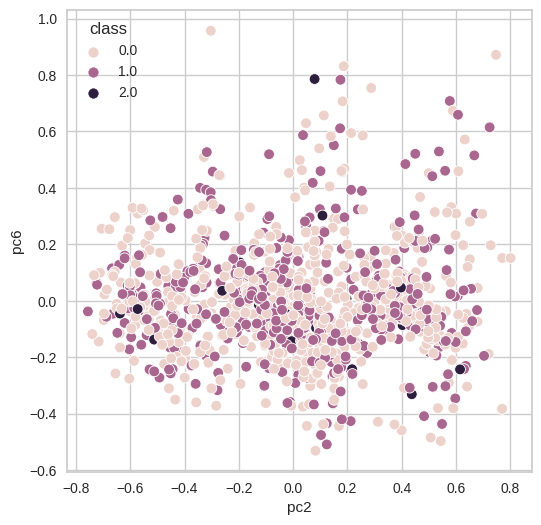

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot( x='pc2', y='pc6',s=60,
  data=df_pca, hue='class',legend=True);

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca_cumsum = np.cumsum(exp_var_pca)

In [ ]:
# np.arange generates consecutive numbers starting from 1 to represent the PCs
array_cumsum = {'Cum. variance %':exp_var_pca_cumsum,'PC':np.arange(1,len(lcolumns)+1)}
df_var_cumsum = pd.DataFrame(array_cumsum)

array_var_exp =  {'Cum. variance %':exp_var_pca,'PC':np.arange(1,len(lcolumns)+1)}
df_var_exp = pd.DataFrame(array_var_exp)

<Axes: xlabel='PC', ylabel='Cum. variance %'>

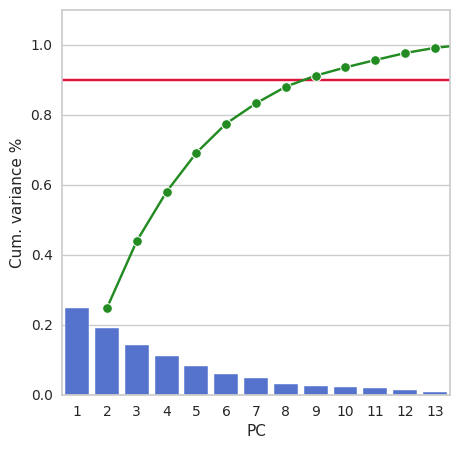

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
plt.ylim(0.0,1.1)
plt.xlim(0,5)
plt.xticks(np.arange(1, 5, step=1))
palette = ['royalblue'] * 4
plt.axhline(y=0.90, color='crimson', linestyle='-') #horizontal line at 90% of variance
sns.lineplot(data=df_var_cumsum,x='PC',y='Cum. variance %',marker='o', color='forestgreen')
sns.barplot(data=df_var_exp, x='PC', y='Cum. variance %', palette=palette)

Aplicando PCA es complicado determinar el número de cluster necesarios para explicar la varianza de la data. En el scatterplot, se ve una nube y no se diferencian las clases y, en el barplot, se podría estimar que se necesitan 10 clases para explicar la data, pero se sabe de antemano que en esta clase solo hay tres, por lo que se concluye que PCA no es la mejor estrategia. 

### **t-SNE**

El algoritmo t-SNE consiste en crear una distribución de probabilidad que represente las similitudes entre vecinos en un espacio de gran dimensión y en un espacio de menor dimensión. Por similitud, se intentará convertir las distancias en probabilidades. (Fuente:DataScientist)

La principal diferencia es que PCA es un algoritmo lineal, por lo que únicamente encontrará dependencias o relaciones lineales en los datos. De esta forma obviará todo tipo de relación polinomial compleja, mientras que T-SNE si que será capaz de resaltarlas. (Fuente: The Machine Learners)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Artificial Inteligence applied to Engineering/ASSIGMENTS/customer_data_large.csv')
#df = pd.read_csv('/content/drive/MyDrive/customer_data_large.csv')

In [ ]:
df.head()

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
0,3,0,58,635,88,88,88,8,4,7,65,10,1,718
1,3,1,38,11,1,1,6,1,2,5,63,8,0,8
2,3,0,26,426,49,21,42,8,10,4,57,9,0,238
3,3,1,26,11,4,3,5,7,4,6,38,8,0,30
4,5,1,94,173,43,27,15,5,6,5,41,8,0,164


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.isnull().describe()

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
count,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230


Solo se quiere la variables predictivas, 'KidHome' es la clase a predecir.

In [ ]:
features = ['Education','Recency','MntWines','MntFruits','MntSweetProducts','MntGoldProds','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Years_customer','Num_AcceptedCmp','MntFishMeatProdcts']
X = df.loc[:, features]
y = df['Kidhome']

Se crea una clase de TSNE y se ajusta a la data, se le asignan nombres a las columnas y se convierte a dataframe

In [ ]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

In [ ]:
columns_names= ['comp1','comp2']
df_tsne = pd.DataFrame(X_tsne,index=X.index,columns=columns_names)
df_tsne

,comp1,comp2
0,43.314522,22.554895
1,-68.182785,-3.489689
2,22.475386,-9.217317
3,-52.841026,-10.960237
4,2.037202,-3.631957
...,...,...
2225,54.515438,-18.236956
2226,27.111383,-28.986929
2227,59.190174,-7.469963
2228,28.341627,-3.356075


In [ ]:
df_tsne.dtypes

comp1    float32
comp2    float32
dtype: object

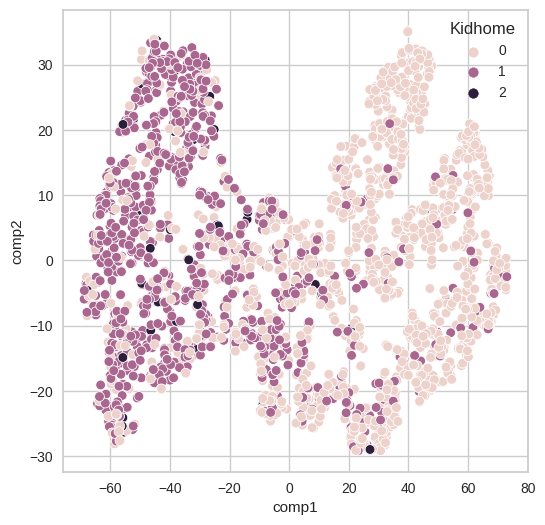

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_tsne, x='comp1',y='comp2',hue=y,legend='full');

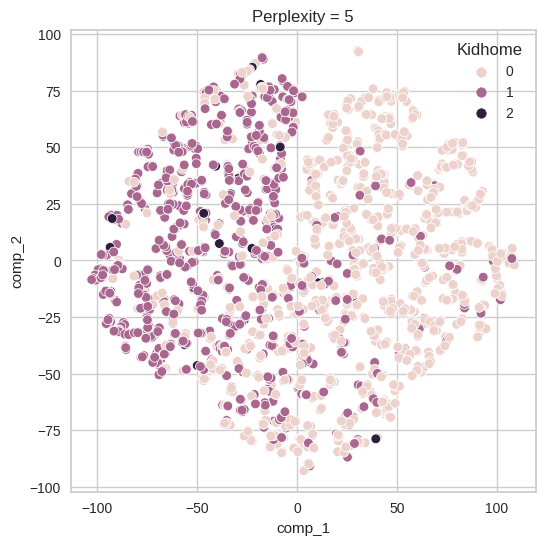

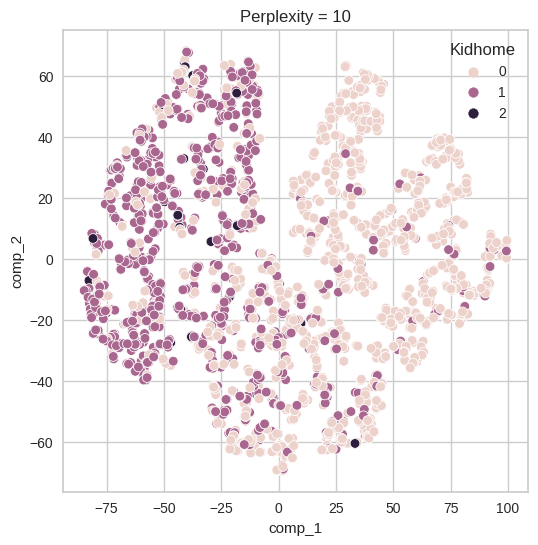

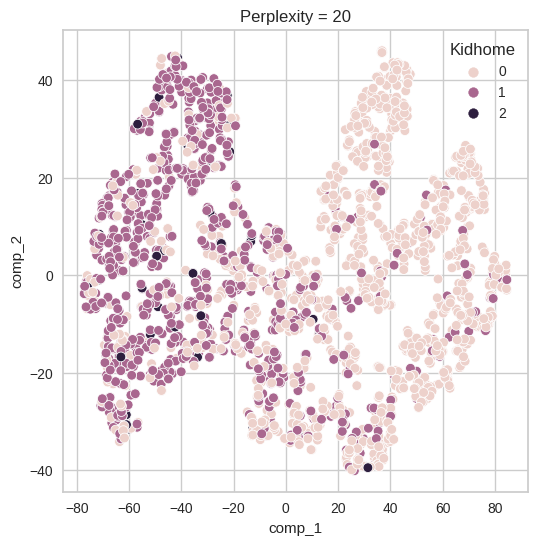

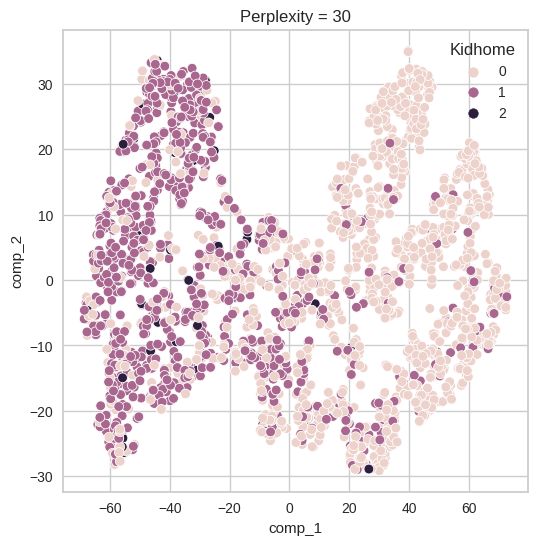

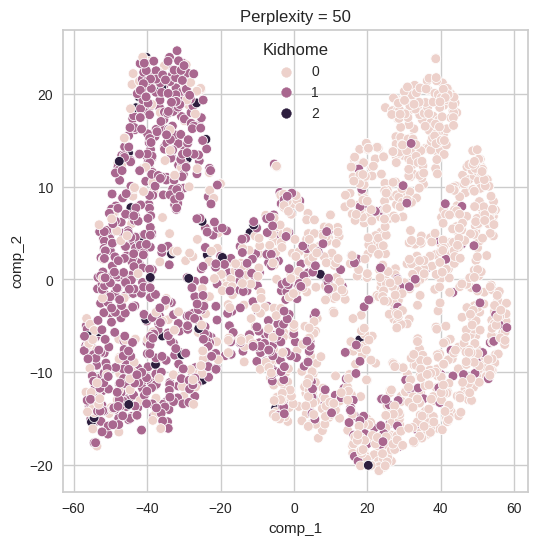

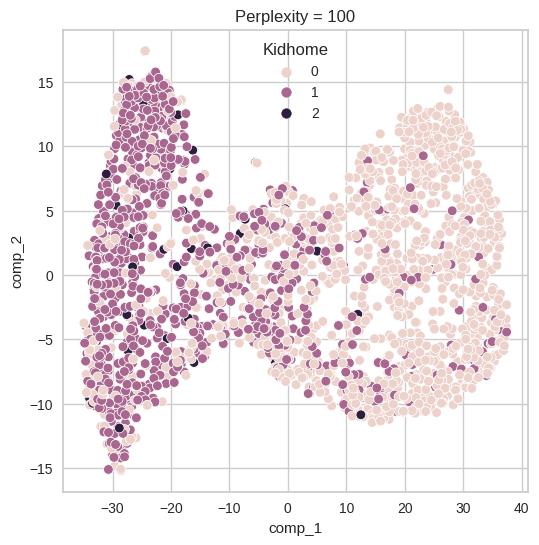

In [ ]:
for perp in [5,10,20,30,50,100]:
  tsne = TSNE(perplexity=perp,random_state=72)
  X_tsne = tsne.fit_transform(X)
  dicc_tsne = {'comp_1':X_tsne[:,0],'comp_2':X_tsne[:,1]}
  df_tsne = pd.DataFrame(dicc_tsne,index=X.index)
  plt.figure(figsize=(6,6))
  plt.title('Perplexity = ' + str(perp))
  sns.scatterplot(data=df_tsne, x='comp_1',y='comp_2',hue=y, legend='full');

Después de analizar los tres métodos, se puede observar como con PCA y t-SNE no se pueden definir bien los clusters, por lo cual se concluye que, aún con las limitacines de K-means, sigo siendo el mejor método entre los 3 para trabajar este dataset